# test-8

LogCircular 1:100 GO (FLUX)

9 gen 2024 but at 23 dic 2024

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def make_plots(file_name, reference_file_name=None, show_conservative=False, exact_value=None, sup_title=None, print_table=False):
    data = pd.read_csv(file_name)

    if exact_value is not None:
        data['std FLUX err'] = data['std FLUX err'] / exact_value
        data['est err'] = data['est err'] / exact_value


    pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
    if(print_table):
        print(data)

    if reference_file_name is not None:
        reference_data = pd.read_csv(reference_file_name)
        if exact_value is not None:
            reference_data['std FLUX err'] = reference_data['std FLUX err'] / exact_value

    # Creazione della figura con due subplot
    fig, axes = plt.subplots(1, 2, figsize=(13, 6))

    # Primo subplot
    axes[0].loglog(data['DoFs'], data['std FLUX err'], "r-+", linewidth=1.0, label='Exact Error (std)')
    axes[0].loglog(data['DoFs'], data['est err'], "g-+", linewidth=1.0, label='Estimated Error')
    if reference_file_name is not None:
        axes[0].loglog(reference_data['DoFs'], reference_data['std FLUX err'], "b-+", linewidth=0.3, label='GlobRef exact error (std) (Reference)')

    if show_conservative:
        axes[0].loglog(data['DoFs'], data['Cons. FLUX err'], "r:+", linewidth=1.0, label='Exact Error (cons)')
        if reference_file_name is not None:
            axes[0].loglog(reference_data['DoFs'], reference_data['Cons. FLUX err'], "b:+", linewidth=0.5, label='GlobRef exact error (cons) (Reference)')

    axes[0].set_xlabel('Degrees of Freedom (DoFs)', fontsize=12)
    axes[0].set_ylabel('Relative error' if exact_value is not None else 'Absolute error', fontsize=12)
    axes[0].set_title('Exact vs Estimated FLUX error', fontsize=14)
    axes[0].legend()
    axes[0].grid(True, which="both", linestyle='--', linewidth=0.5)

    # Secondo subplot
    axes[1].loglog(data['DoFs'], data['std FLUX err'], "r-+", linewidth=0.5, label='Exact Error')
    axes[1].loglog(data['DoFs'], abs(data['std FLUX err'] - data["est err"]), "y-+", linewidth=0.5, label='Error in [computed value + estimated error]')
    axes[1].set_xlabel('Degrees of Freedom (DoFs)', fontsize=12)
    axes[1].set_title('Exact error and residual', fontsize=14)
    axes[1].legend()
    axes[1].grid(True, which="both", linestyle='--', linewidth=0.5)

    # Aggiunta del titolo comune
    if sup_title:
        fig.suptitle(sup_title, fontsize=16)

    # Miglior layout e mostra il grafico
    fig.tight_layout(rect=[0, 0, 1, 0.95])  # Lascia spazio per il titolo principale
    plt.show()


config-2

Mesh-A, non-iso

    cycle  cells    DoFs     ex POINT err               L2               H1  \
0       0   5760    5820 2.5429110493e+01 1.6302386256e+00 2.2218827840e+03   
1       1   5907    6020 1.7105175109e+01 1.0571759947e+00 1.8506747645e+03   
2       2   6195    6393 1.0502294443e+01 6.1680343915e-01 1.5022275051e+03   
3       3   6516    6830 9.2879590339e+00 5.4333321381e-01 1.4270229631e+03   
4       4   7020    7500 9.0351439360e+00 5.2854324290e-01 1.4101693986e+03   
5       5   8460    9420 8.9706425554e+00 5.2467413675e-01 1.4057443778e+03   
6       6  11328   13246 8.9627991344e+00 5.2420451503e-01 1.4051477727e+03   
7       7  16770   20467 4.6916598667e+00 2.8860057114e-01 1.1105682983e+03   
8       8  29841   36729 2.0267175344e+00 2.4125977892e-01 8.7784895281e+02   
9       9  50223   62573 6.8454355225e-01 2.6924707189e-01 7.3342768434e+02   
10     10  86868  109151 5.5982893349e-01 3.1193962466e-01 5.6940317029e+02   

       std FLUX err          est err   Cons. FLUX e

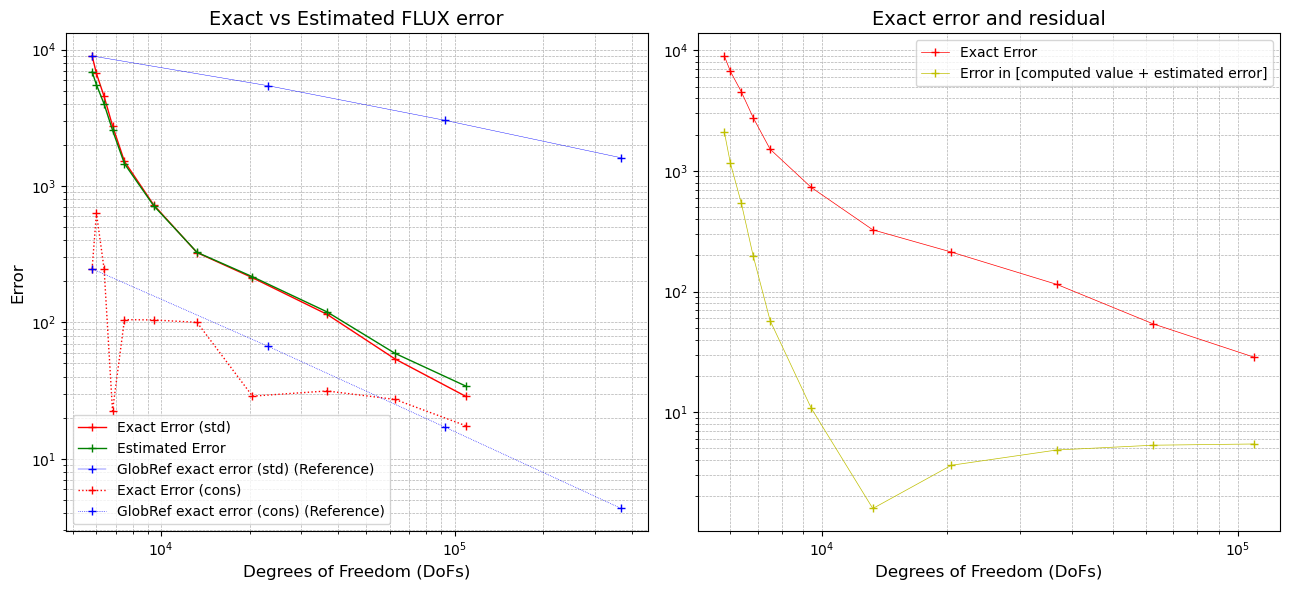

In [4]:
make_plots("./results/config-2/convergence_results.csv","./results/config-1/convergence_results.csv",show_conservative=True)

config-4

mesh-B \
iso

    cycle   cells    DoFs     ex POINT err               L2               H1  \
0       0     252     270 5.2601992274e+01 2.9114076976e+00 2.2465363407e+03   
1       1     297     331 5.0197032667e+01 2.7989663970e+00 2.1525436321e+03   
2       2     381     444 4.9252648728e+01 2.7562235359e+00 2.1144220175e+03   
3       3     540     658 4.9036052259e+01 2.7465856737e+00 2.1056038080e+03   
4       4     873    1101 4.8995897039e+01 2.7447945852e+00 2.1039552997e+03   
5       5    1689    2144 4.3992096464e+01 2.5347142518e+00 1.8876175979e+03   
6       6    2967    3680 6.4135502253e+00 7.5205956463e-01 1.1461052039e+03   
7       7    5250    6710 5.0158655649e+00 6.8494485042e-01 1.0338935549e+03   
8       8    9315   12053 5.3508983021e+00 4.5596868776e-01 8.2356741773e+02   
9       9   16572   20825 2.4761465987e+00 1.8292686716e-01 5.5655321496e+02   
10     10   32490   41529 2.0465235592e+00 1.4926451951e-01 4.6753262976e+02   
11     11   58476   73266 9.2630338104e-

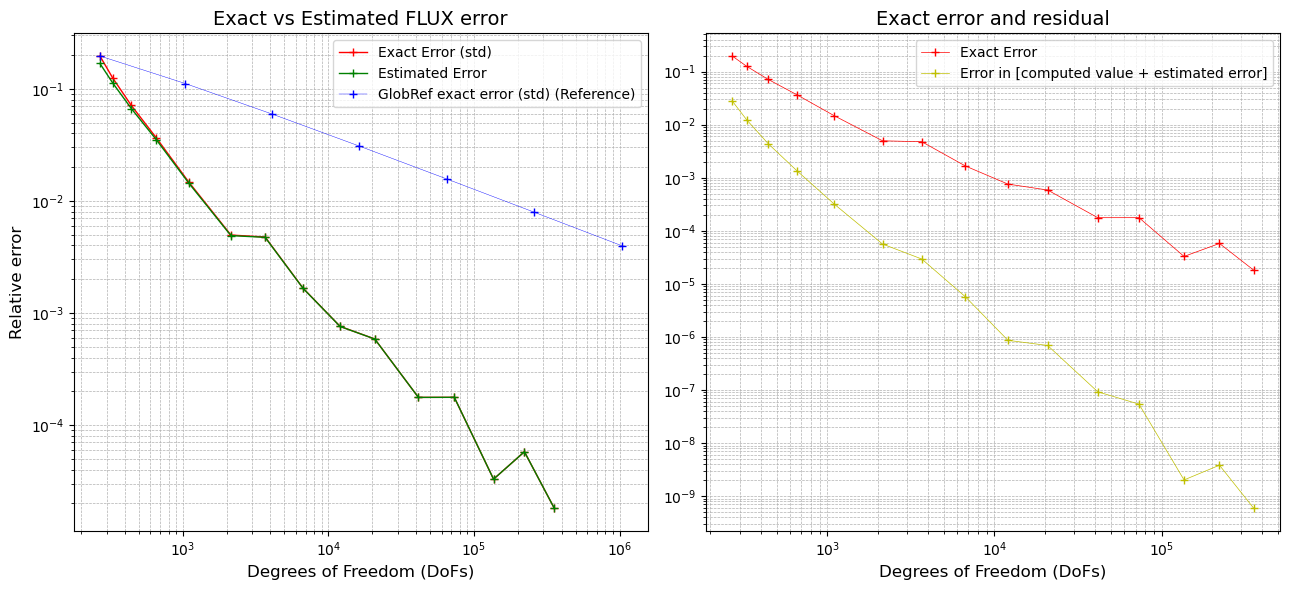

In [63]:
make_plots("./results/config-4/convergence_results.csv","./results/config-3/convergence_results.csv",show_conservative=False,exact_value=2.728752707684e+04)

config-5

refine_optimize(3)

    cycle   cells    DoFs     ex POINT err               L2               H1  \
0       0     252     270 5.2599015999e+01 2.9113970145e+00 2.2465357781e+03   
1       1     306     342 4.9844803098e+01 2.7829613220e+00 2.1385009526e+03   
2       2     414     486 4.9307190146e+01 2.7587812794e+00 2.1167409525e+03   
3       3     630     774 4.9229995757e+01 2.7553345487e+00 2.1136002300e+03   
4       4    1764    2052 1.5079703635e+01 7.3884517406e-01 1.2942249995e+03   
5       5    2628    3204 1.5078367968e+01 7.3878640992e-01 1.2941357193e+03   
6       6    7272    8424 5.1969572995e+00 1.9441072757e-01 7.3568898074e+02   
7       7   10728   13032 5.1969358853e+00 1.9440979589e-01 7.3568646031e+02   
8       8   29520   34128 1.4798928436e+00 4.9868446913e-02 3.8854441041e+02   
9       9   43344   52560 1.4798925070e+00 4.9868432291e-02 3.8854433537e+02   
10     10  119733  138172 2.2497755197e-01 1.2565693706e-02 1.9864755609e+02   
11     11  175029  211900 2.2497754669e-

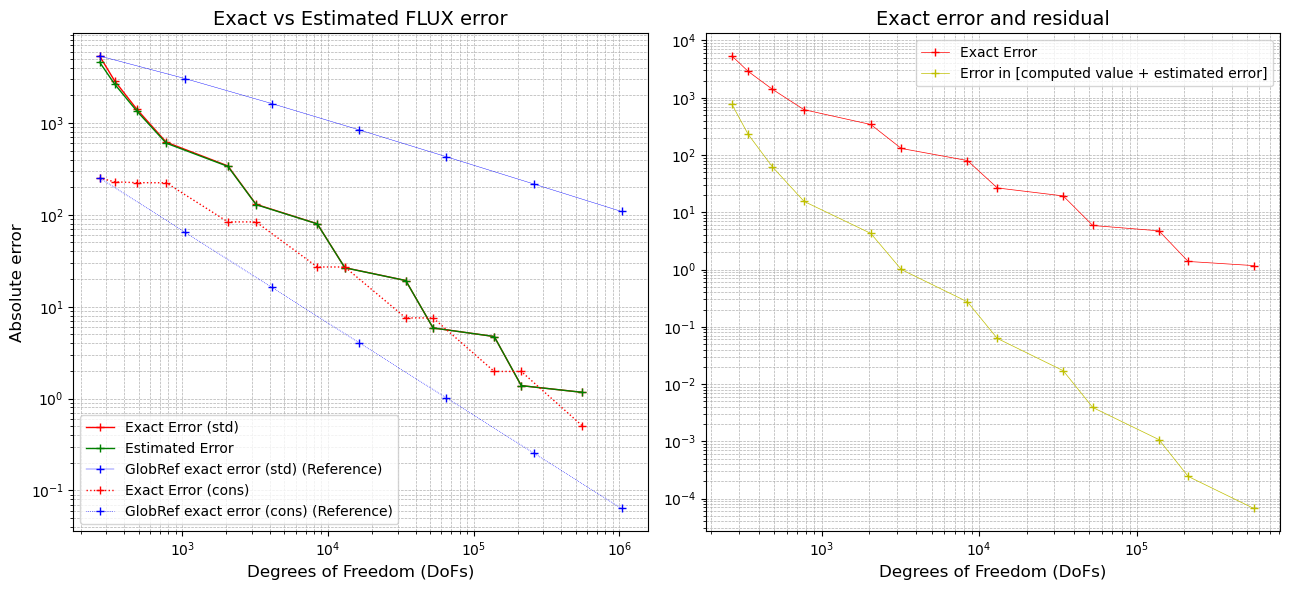

In [62]:
make_plots("./results/config-5/convergence_results.csv","./results/config-3/convergence_results.csv",show_conservative=True)

config-6: Confronto GlobRef - fGO curved - ConcentricRef


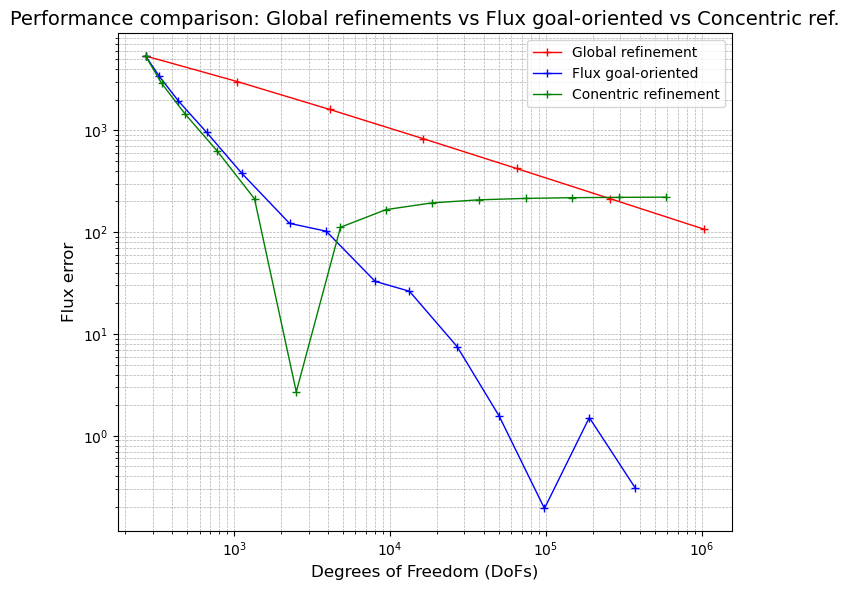

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

glob_file_name = "./results/config-3/convergence_results.csv"
fGO_file_name = "./results/config-4/convergence_results.csv"
concentric_file_name = "./results/config-6/convergence_results.csv"

glob_data = pd.read_csv(glob_file_name)
fGO_data = pd.read_csv(fGO_file_name)
concentric_data = pd.read_csv(concentric_file_name)

plt.figure(figsize=(7, 6))  # Adjust the figure size for two plots

plt.subplot(1, 1, 1)  # Second subplot (bottom)
plt.loglog(glob_data['DoFs'], glob_data['std FLUX err'],"r-+", linewidth=1.0, label='Global refinement')
plt.loglog(fGO_data['DoFs'], fGO_data['std FLUX err'],"b-+", linewidth=1.0, label='Flux goal-oriented')
plt.loglog(concentric_data['DoFs'], concentric_data['std FLUX err'],"g-+", linewidth=1.0, label='Conentric refinement')


plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Flux error', fontsize=12)
plt.title('Performance comparison: Global refinements vs Flux goal-oriented vs Concentric ref.', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

config-11

Mesh-B but before iso

Effetto Transfinite Interpolation Manifold piuttosto che FlatManifold

    cycle  cells    DoFs     ex POINT err               L2               H1  \
0       0    252     270 5.1270882559e+01 1.8582515005e+00 3.2709390661e+03   
1       1    300     335 5.1894471014e+01 1.8538374105e+00 3.1621606366e+03   
2       2    402     471 5.2331793829e+01 1.8513967777e+00 3.1263115798e+03   
3       3    678     819 4.8239077475e+01 1.8917446901e+00 2.9978033689e+03   
4       4   1356    1637 3.2409041324e+01 2.3567523882e+00 2.4996336332e+03   
5       5   2376    2876 6.2867567651e+00 4.7711046222e-01 1.5890531884e+03   
6       6   5103    6302 3.8329977050e+00 5.1106237134e-01 1.3690102597e+03   
7       7   8820   10559 2.9098576606e+00 1.2420228235e-01 8.3391167769e+02   
8       8  17781   21662 2.1063905288e+00 1.2312422378e-01 7.2132364586e+02   
9       9  30891   36252 9.5296965908e-01 3.2197409326e-02 4.2741624057e+02   
10     10  54810   66084 6.0206608278e-02 3.6068055905e-02 3.9219789221e+02   
11     11  97065  117898 6.2220368176e-01 3.19965750

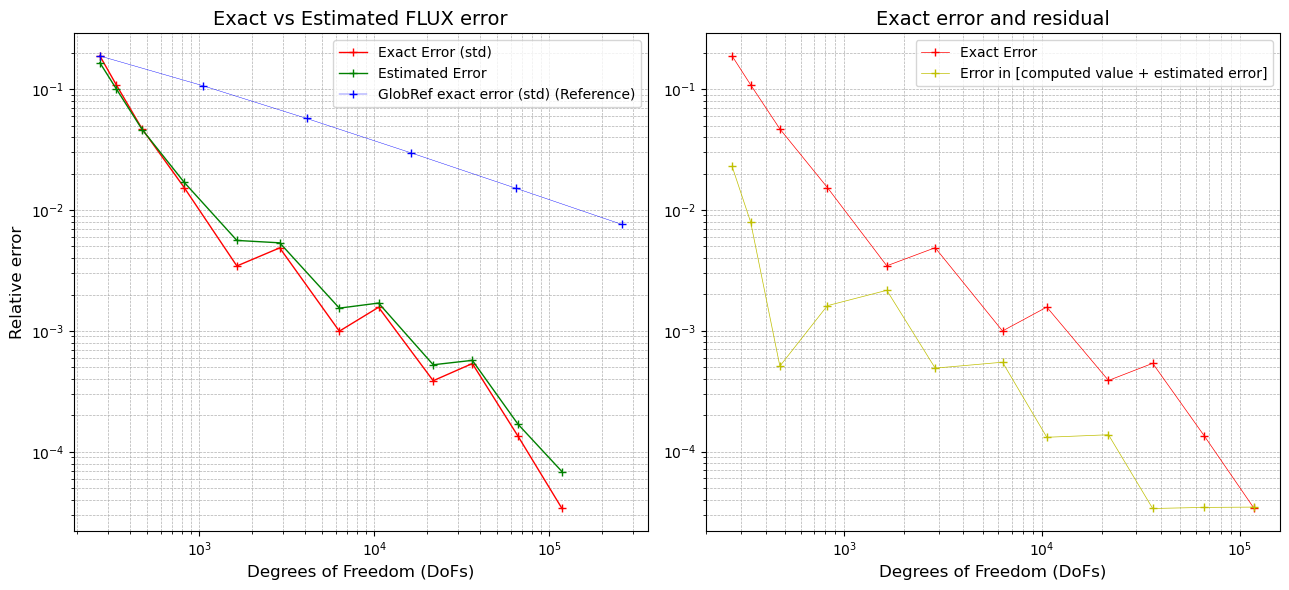

In [60]:
make_plots("./results/config-11/convergence_results.csv","./results/config-10/convergence_results.csv",exact_value=2.728752707684e+04)

CONFRONTO biquadratic mapping full Manif VS bilinear mapping TransfiniteInterpolation

Note: Too many variables 

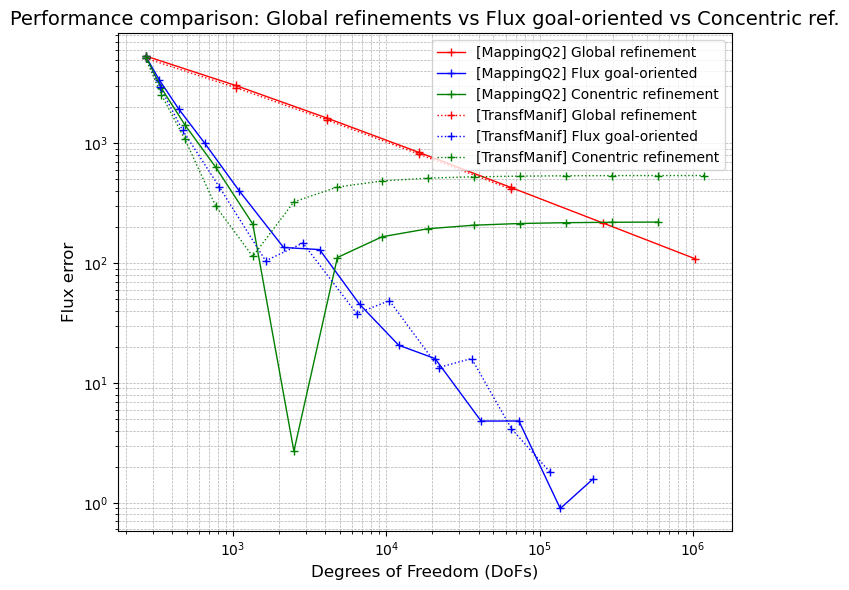

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

glob_file_name1 = "./results/config-3/convergence_results.csv"
fGO_file_name1 = "./results/config-4/convergence_results.csv"
concentric_file_name1 = "./results/config-6/convergence_results.csv"

glob_file_name2 = "./results/config-13/convergence_results.csv"
fGO_file_name2 = "./results/config-14/convergence_results.csv"
concentric_file_name2 = "./results/config-15/convergence_results.csv"

glob_data1 = pd.read_csv(glob_file_name1)
fGO_data1 = pd.read_csv(fGO_file_name1)
concentric_data1 = pd.read_csv(concentric_file_name1)

glob_data2 = pd.read_csv(glob_file_name2)
fGO_data2 = pd.read_csv(fGO_file_name2)
concentric_data2 = pd.read_csv(concentric_file_name2)

plt.figure(figsize=(7, 6))  # Adjust the figure size for two plots

plt.subplot(1, 1, 1)  # Second subplot (bottom)
plt.loglog(glob_data1['DoFs'], glob_data1['std FLUX err'],"r-+", linewidth=1.0, label='[MappingQ2] Global refinement')
plt.loglog(fGO_data1['DoFs'], fGO_data1['std FLUX err'],"b-+", linewidth=1.0, label='[MappingQ2] Flux goal-oriented')
plt.loglog(concentric_data1['DoFs'], concentric_data1['std FLUX err'],"g-+", linewidth=1.0, label='[MappingQ2] Conentric refinement')

plt.loglog(glob_data2['DoFs'], glob_data2['std FLUX err'],"r:+", linewidth=1.0, label='[TransfManif] Global refinement')
plt.loglog(fGO_data2['DoFs'], fGO_data2['std FLUX err'],"b:+", linewidth=1.0, label='[TransfManif] Flux goal-oriented')
plt.loglog(concentric_data2['DoFs'], concentric_data2['std FLUX err'],"g:+", linewidth=1.0, label='[TransfManif] Conentric refinement')

plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Flux error', fontsize=12)
plt.title('Performance comparison: Global refinements vs Flux goal-oriented vs Concentric ref.', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### COMPARISON A: 
Fix: Manifold description: Curved on boundary, Trnasfinite interpoaltion internally

Change: MappingQ degree: Bilinear vs biquadratic

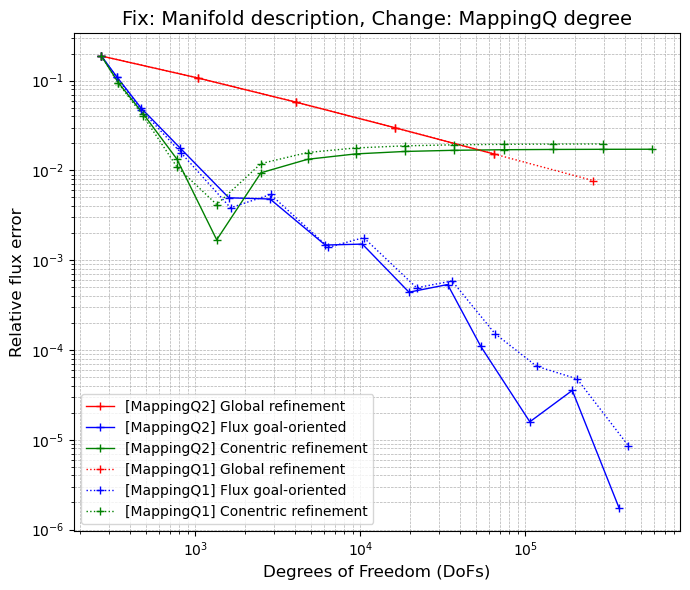

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

exact_value = 2.728752707684e+04

glob_file_name1 = "./results/config-16/convergence_results.csv"
fGO_file_name1 = "./results/config-17/convergence_results.csv"
concentric_file_name1 = "./results/config-18/convergence_results.csv"

glob_file_name2 = "./results/config-13/convergence_results.csv"
fGO_file_name2 = "./results/config-14/convergence_results.csv"
concentric_file_name2 = "./results/config-15/convergence_results.csv"

glob_data1 = pd.read_csv(glob_file_name1)
fGO_data1 = pd.read_csv(fGO_file_name1)
concentric_data1 = pd.read_csv(concentric_file_name1)

glob_data2 = pd.read_csv(glob_file_name2)
fGO_data2 = pd.read_csv(fGO_file_name2)
concentric_data2 = pd.read_csv(concentric_file_name2)

plt.figure(figsize=(7, 6))  # Adjust the figure size for two plots

plt.subplot(1, 1, 1)  # Second subplot (bottom)
plt.loglog(glob_data1['DoFs'], glob_data1['std FLUX err']/exact_value,"r-+", linewidth=1.0, label='[MappingQ2] Global refinement')
plt.loglog(fGO_data1['DoFs'], fGO_data1['std FLUX err']/exact_value,"b-+", linewidth=1.0, label='[MappingQ2] Flux goal-oriented')
plt.loglog(concentric_data1['DoFs'], concentric_data1['std FLUX err']/exact_value,"g-+", linewidth=1.0, label='[MappingQ2] Conentric refinement')

plt.loglog(glob_data2['DoFs'], glob_data2['std FLUX err']/exact_value,"r:+", linewidth=1.0, label='[MappingQ1] Global refinement')
plt.loglog(fGO_data2['DoFs'], fGO_data2['std FLUX err']/exact_value,"b:+", linewidth=1.0, label='[MappingQ1] Flux goal-oriented')
plt.loglog(concentric_data2['DoFs'], concentric_data2['std FLUX err']/exact_value,"g:+", linewidth=1.0, label='[MappingQ1] Conentric refinement')

plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Relative flux error', fontsize=12)
plt.title('Fix: Manifold description, Change: MappingQ degree', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

config-14: MappingQ1 on TransfiniteManifold

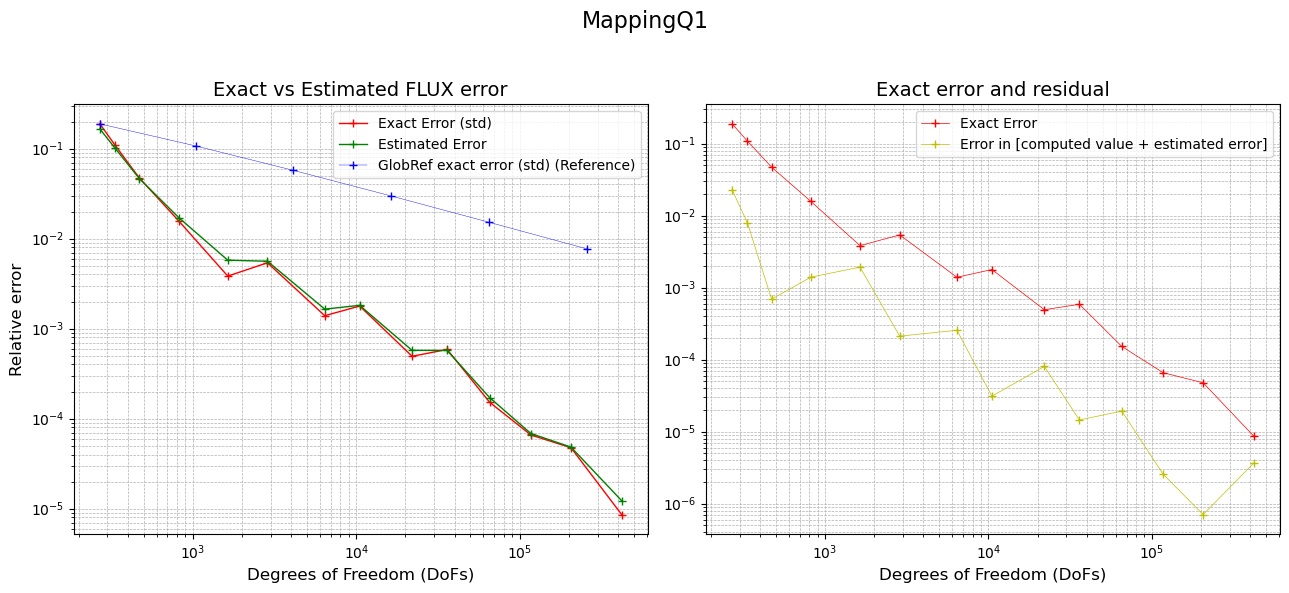

In [84]:
make_plots("./results/config-14/convergence_results.csv","./results/config-13/convergence_results.csv",exact_value=2.728752707684e+04, sup_title="MappingQ1")

config-17: MappingQ2 on transfiniteManifold

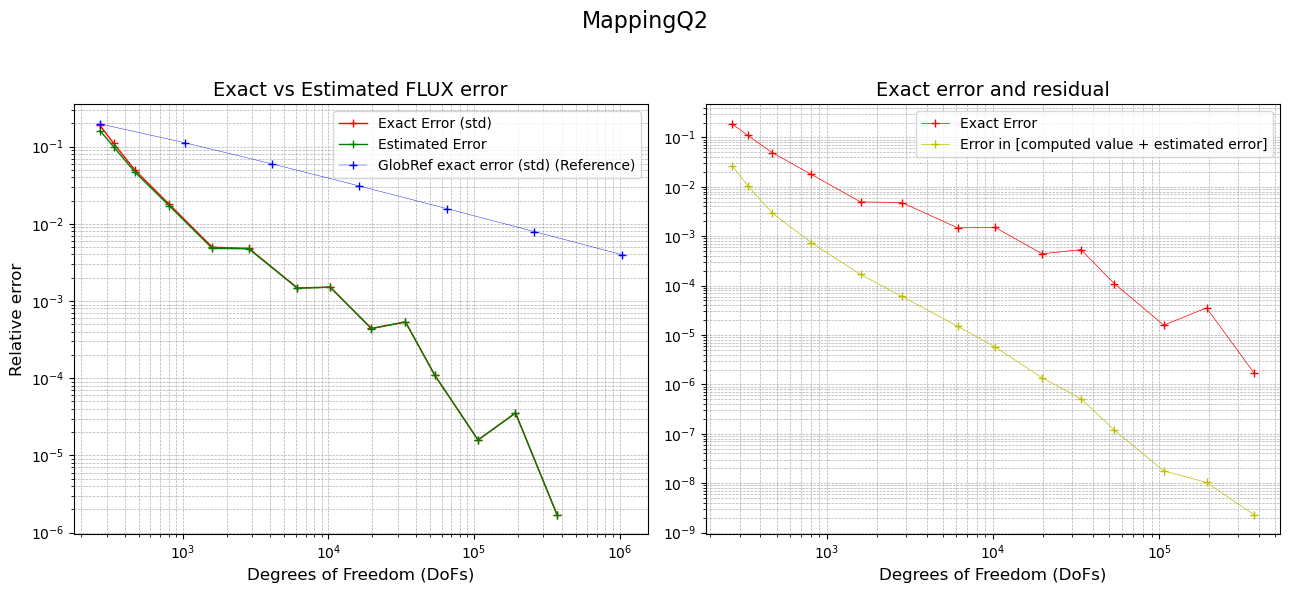

In [83]:
make_plots("./results/config-17/convergence_results.csv","./results/config-3/convergence_results.csv",exact_value=2.728752707684e+04, sup_title="MappingQ2")

### COMPARISON B: 

Fix: MappingQ1 

Change: Manifold description (Curved at the boundary, then internally Flat vs TransfiniteInterpolation)

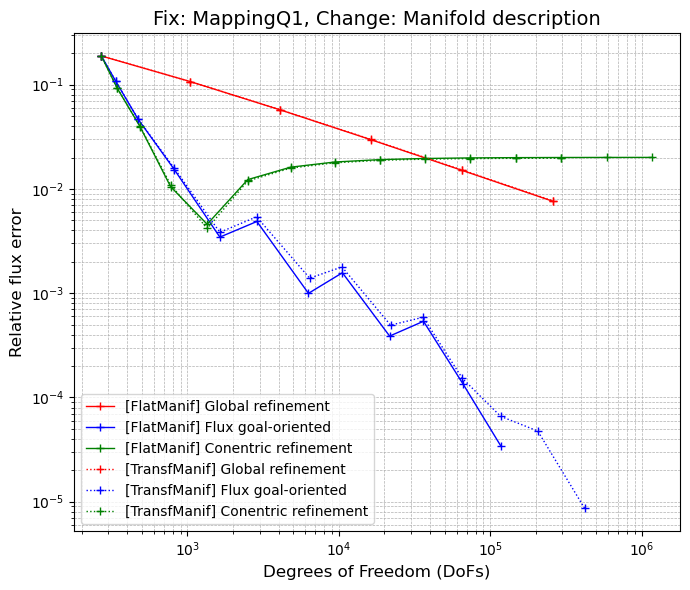

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

exact_value = 2.728752707684e+04

glob_file_name1 = "./results/config-10/convergence_results.csv"
fGO_file_name1 = "./results/config-11/convergence_results.csv"
concentric_file_name1 = "./results/config-12/convergence_results.csv"

glob_file_name2 = "./results/config-13/convergence_results.csv"
fGO_file_name2 = "./results/config-14/convergence_results.csv"
concentric_file_name2 = "./results/config-15/convergence_results.csv"

glob_data1 = pd.read_csv(glob_file_name1)
fGO_data1 = pd.read_csv(fGO_file_name1)
concentric_data1 = pd.read_csv(concentric_file_name1)

glob_data2 = pd.read_csv(glob_file_name2)
fGO_data2 = pd.read_csv(fGO_file_name2)
concentric_data2 = pd.read_csv(concentric_file_name2)

plt.figure(figsize=(7, 6))  # Adjust the figure size for two plots

plt.subplot(1, 1, 1)  # Second subplot (bottom)
plt.loglog(glob_data1['DoFs'], glob_data1['std FLUX err']/exact_value,"r-+", linewidth=1.0, label='[FlatManif] Global refinement')
plt.loglog(fGO_data1['DoFs'], fGO_data1['std FLUX err']/exact_value,"b-+", linewidth=1.0, label='[FlatManif] Flux goal-oriented')
plt.loglog(concentric_data1['DoFs'], concentric_data1['std FLUX err']/exact_value,"g-+", linewidth=1.0, label='[FlatManif] Conentric refinement')

plt.loglog(glob_data2['DoFs'], glob_data2['std FLUX err']/exact_value,"r:+", linewidth=1.0, label='[TransfManif] Global refinement')
plt.loglog(fGO_data2['DoFs'], fGO_data2['std FLUX err']/exact_value,"b:+", linewidth=1.0, label='[TransfManif] Flux goal-oriented')
plt.loglog(concentric_data2['DoFs'], concentric_data2['std FLUX err']/exact_value,"g:+", linewidth=1.0, label='[TransfManif] Conentric refinement')

plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Relative flux error', fontsize=12)
plt.title('Fix: MappingQ1, Change: Manifold description', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

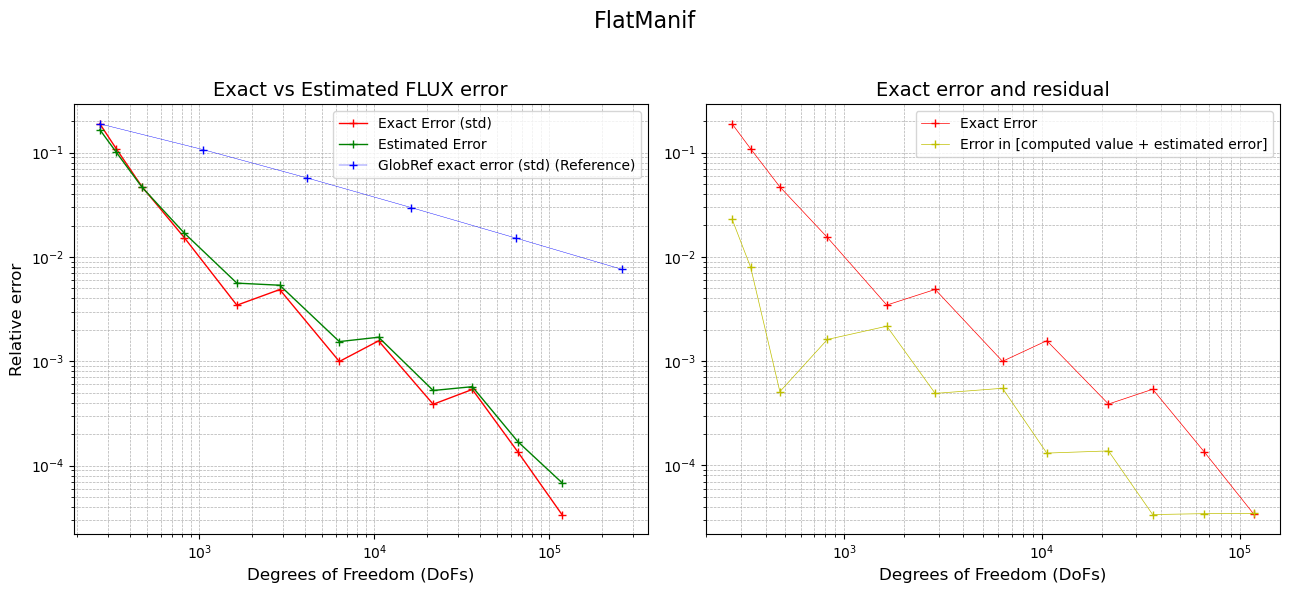

In [85]:
make_plots("./results/config-11/convergence_results.csv","./results/config-10/convergence_results.csv",exact_value=2.728752707684e+04, sup_title="FlatManif")

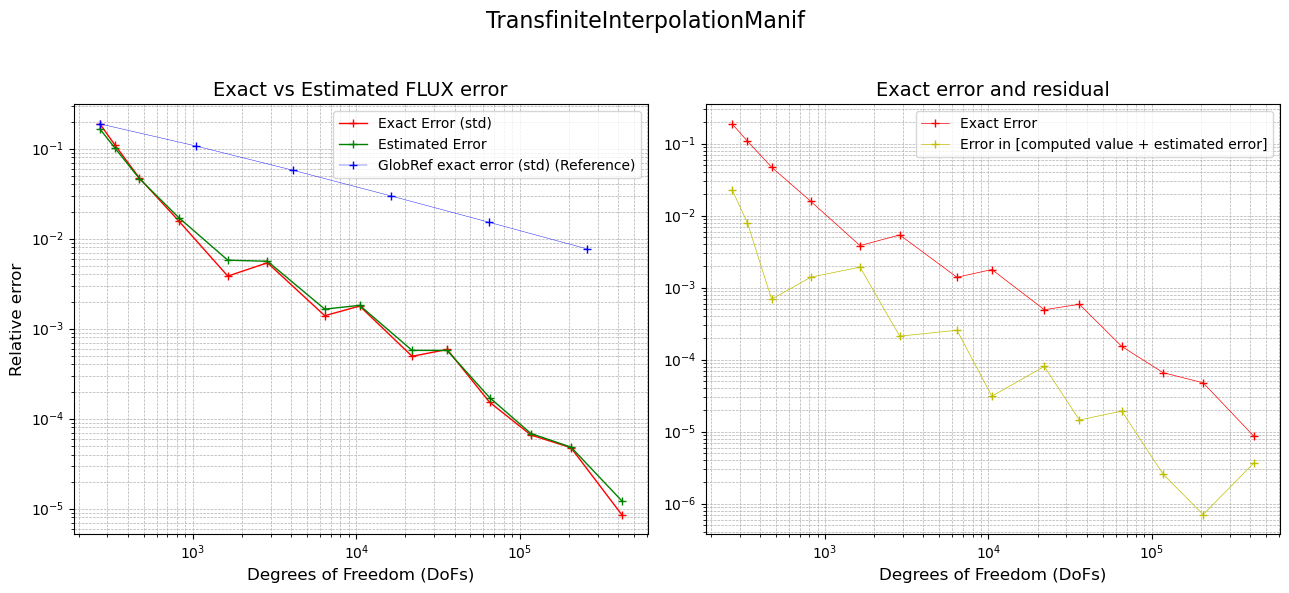

In [86]:
make_plots("./results/config-14/convergence_results.csv","./results/config-13/convergence_results.csv",exact_value=2.728752707684e+04, sup_title="TransfiniteInterpolationManif")

### COMPARISON C: 

Fix: MappingQ2 

Change: Manifold description (Curved at the boundary, then internally Flat vs TransfiniteInterpolation)

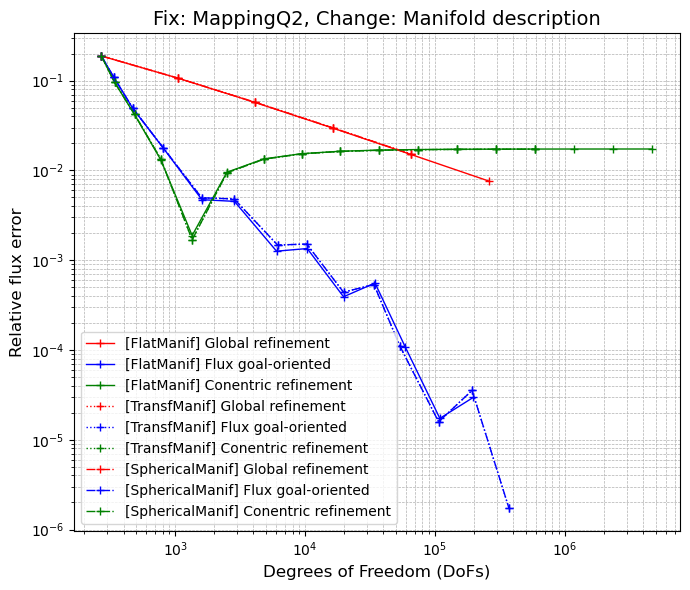

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

exact_value = 2.728752707684e+04

glob_file_name1 = "./results/config-19/convergence_results.csv"
fGO_file_name1 = "./results/config-20/convergence_results.csv"
concentric_file_name1 = "./results/config-21/convergence_results.csv"

glob_file_name2 = "./results/config-16/convergence_results.csv"
fGO_file_name2 = "./results/config-17/convergence_results.csv"
concentric_file_name2 = "./results/config-18/convergence_results.csv"

lob_file_name3 = "./results/config-3/convergence_results.csv"
fGO_file_name3 = "./results/config-4/convergence_results.csv"
concentric_file_name3 = "./results/config-6/convergence_results.csv"

glob_data1 = pd.read_csv(glob_file_name1)
fGO_data1 = pd.read_csv(fGO_file_name1)
concentric_data1 = pd.read_csv(concentric_file_name1)

glob_data2 = pd.read_csv(glob_file_name2)
fGO_data2 = pd.read_csv(fGO_file_name2)
concentric_data2 = pd.read_csv(concentric_file_name2)

glob_data3 = pd.read_csv(glob_file_name2)
fGO_data3 = pd.read_csv(fGO_file_name2)
concentric_data3 = pd.read_csv(concentric_file_name2)

plt.figure(figsize=(7, 6))  # Adjust the figure size for two plots

plt.subplot(1, 1, 1)  # Second subplot (bottom)
plt.loglog(glob_data1['DoFs'], glob_data1['std FLUX err']/exact_value,"r-+", linewidth=1.0, label='[FlatManif] Global refinement')
plt.loglog(fGO_data1['DoFs'], fGO_data1['std FLUX err']/exact_value,"b-+", linewidth=1.0, label='[FlatManif] Flux goal-oriented')
plt.loglog(concentric_data1['DoFs'], concentric_data1['std FLUX err']/exact_value,"g-+", linewidth=1.0, label='[FlatManif] Conentric refinement')

plt.loglog(glob_data2['DoFs'], glob_data2['std FLUX err']/exact_value,"r:+", linewidth=1.0, label='[TransfManif] Global refinement')
plt.loglog(fGO_data2['DoFs'], fGO_data2['std FLUX err']/exact_value,"b:+", linewidth=1.0, label='[TransfManif] Flux goal-oriented')
plt.loglog(concentric_data2['DoFs'], concentric_data2['std FLUX err']/exact_value,"g:+", linewidth=1.0, label='[TransfManif] Conentric refinement')

plt.loglog(glob_data3['DoFs'], glob_data3['std FLUX err']/exact_value,"r-.+", linewidth=1.0, label='[SphericalManif] Global refinement')
plt.loglog(fGO_data3['DoFs'], fGO_data3['std FLUX err']/exact_value,"b-.+", linewidth=1.0, label='[SphericalManif] Flux goal-oriented')
plt.loglog(concentric_data3['DoFs'], concentric_data3['std FLUX err']/exact_value,"g-.+", linewidth=1.0, label='[SphericalManif] Conentric refinement')


plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Relative flux error', fontsize=12)
plt.title('Fix: MappingQ2, Change: Manifold description', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

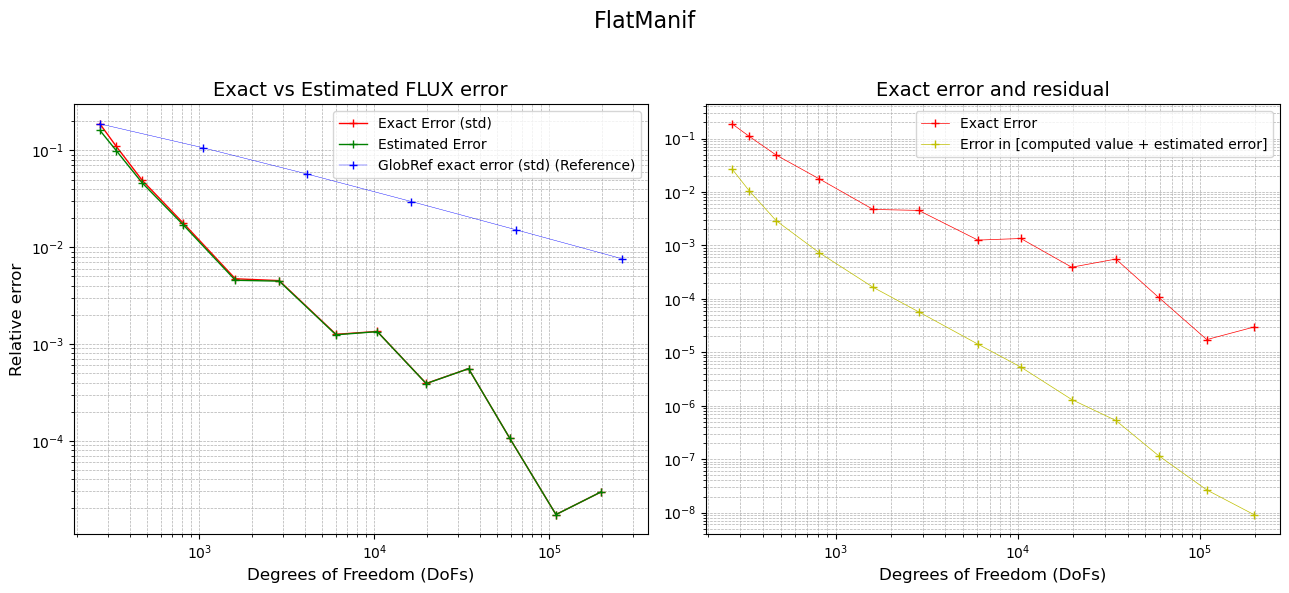

In [88]:
make_plots("./results/config-20/convergence_results.csv","./results/config-19/convergence_results.csv",exact_value=2.728752707684e+04, sup_title="FlatManif")

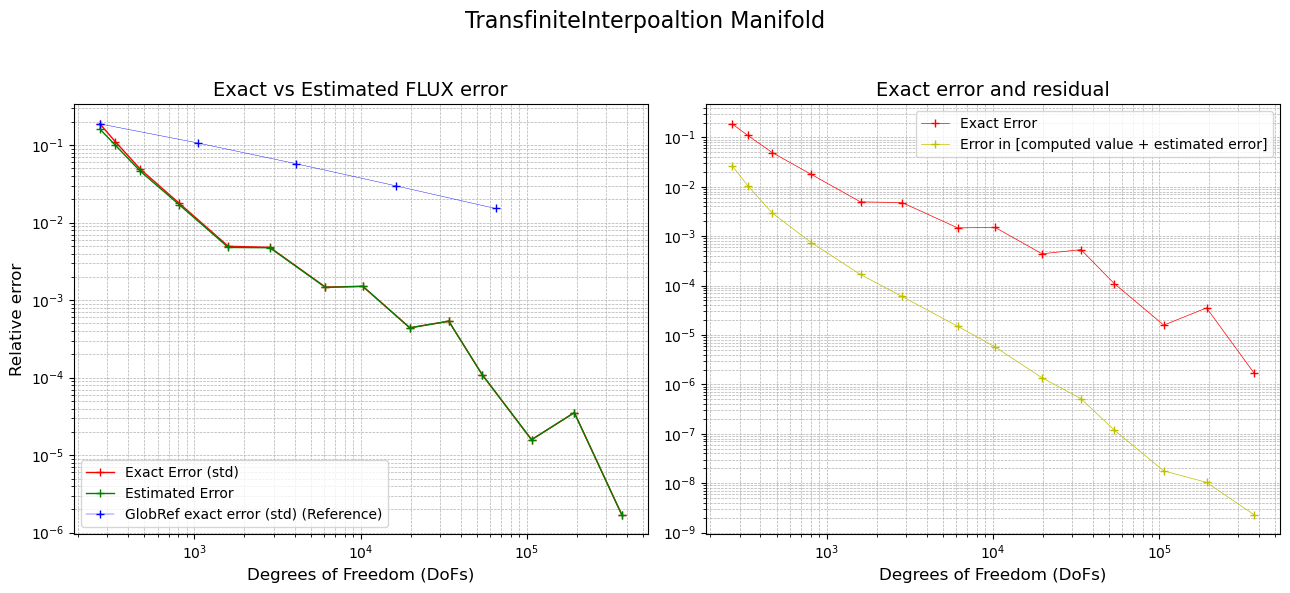

In [89]:
# Already presented above
make_plots("./results/config-17/convergence_results.csv","./results/config-16/convergence_results.csv",exact_value=2.728752707684e+04, sup_title="TransfiniteInterpoaltion Manifold")

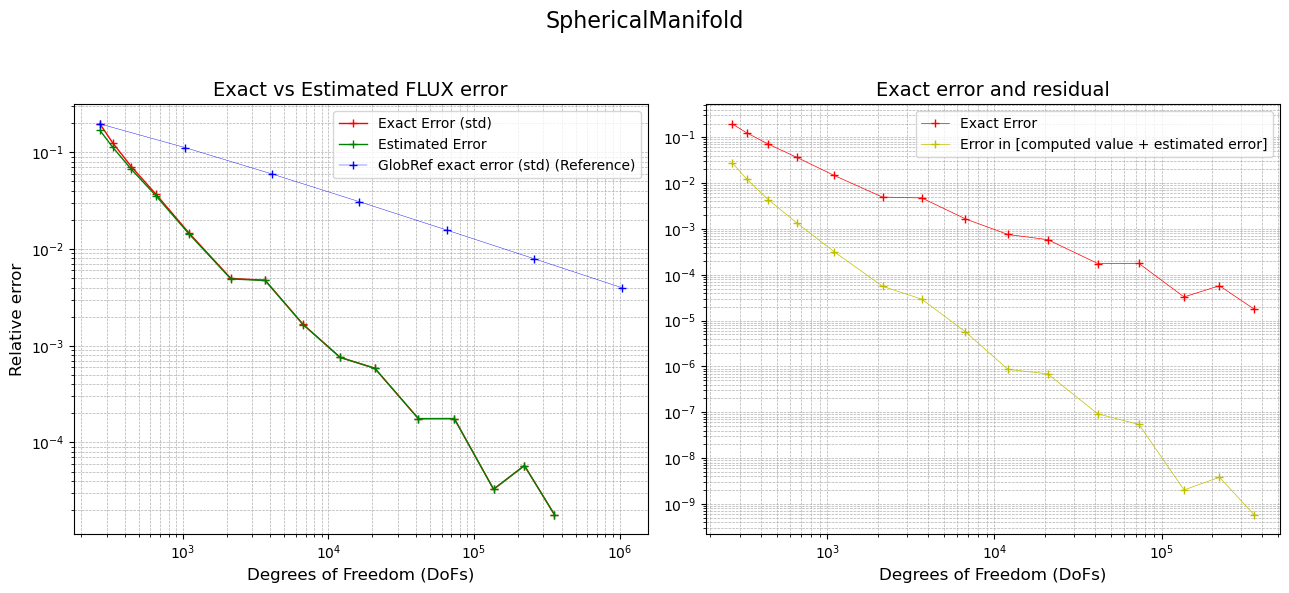

In [94]:
# Already presented above
make_plots("./results/config-4/convergence_results.csv","./results/config-3/convergence_results.csv",exact_value=2.728752707684e+04, sup_title="SphericalManifold")